<a href="https://colab.research.google.com/github/Emanuel-Acosta/AnalisisTiendas/blob/main/AnalisisTiendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Desempeño de las Tiendas de Alura Store

**Objetivo del Proyecto:**
El objetivo de este análisis es ayudar al Sr. Juan a decidir cuál tienda de su cadena Alura Store debería vender para iniciar un nuevo emprendimiento. Para ello, se evaluarán datos clave de las 4 tiendas, como ingresos, categorías más vendidas, reseñas de clientes, productos más vendidos y el envío promedio.

**Metodología:**
- **Análisis de datos de ventas:** Se evaluarán los ingresos y las categorías de productos más populares en cada tienda, lo que nos permitirá identificar el rendimiento de cada una.
- **Evaluación de reseñas de clientes:** Se analizarán las valoraciones y comentarios de los clientes para entender la satisfacción general con cada tienda.
- **Evaluación del envío promedio:** Analizaremos el tiempo promedio de envío de los productos para verificar la eficiencia operativa de cada tienda.

**Visualización de Datos:**
Para facilitar la interpretación de los resultados, se crearán **tres gráficos distintos**, que podrían incluir:
1. Gráficos de barras para comparar ingresos por tienda.
2. Gráficos circulares para mostrar la distribución de las categorías más vendidas.
3. Gráficos de dispersión para analizar la relación entre los ingresos y la satisfacción de los clientes.

### Importación de datos



En esta sección, se cargan los datos de ventas de las 4 tiendas de Alura Store desde archivos CSV almacenados en un repositorio de GitHub. Utilizamos la librería pandas para leer y cargar los datos de cada tienda en un DataFrame, lo que nos permitirá analizarlos y visualizarlos de manera eficiente.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


Los datos corresponden a ventas de productos en distintas categorías como electrónicos, muebles, juguetes y electrodomésticos. Cada entrada incluye información sobre el producto, categoría, precio, costo de envío, fecha de compra, vendedor, lugar de compra, calificación del producto, método de pago y las coordenadas geográficas del lugar de compra. Las calificaciones varían entre 1 y 5, lo que indica la satisfacción del cliente con los productos adquiridos.

#1. Análisis de facturación



Para iniciar el análisis y comparar la facturación entre las cuatro tiendas, es fundamental verificar si los rangos de fechas de venta son lo más similares posible. Esto nos permitirá asegurar que la comparación se base en periodos equivalentes y, por tanto, sea válida y representativa.

### 1.1 Calculo del periodo de ventas por cada tienda:

In [2]:
# Asegurarse de que la columna 'Fecha de Compra' esté en formato de fecha con dayfirst=True
for tienda in [tienda1, tienda2, tienda3, tienda4]:
    tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], dayfirst=True)

# Función para obtener las fechas mínima y máxima de cada tienda
def obtener_fechas(tienda):
    return tienda['Fecha de Compra'].min(), tienda['Fecha de Compra'].max()

# Lista de tiendas
tiendas = [tienda1, tienda2, tienda3, tienda4]

# Crear el diccionario
fechas_tiendas = {
    f'Tienda {i+1}': obtener_fechas(tienda)
    for i, tienda in enumerate(tiendas)
}

# Función para convertir en años, meses (aproximados) y días
def formatear_diferencia(fecha_inicio, fecha_fin):
    diferencia = fecha_fin - fecha_inicio
    dias = diferencia.days
    años = dias // 365
    dias_restantes = dias % 365
    meses = dias_restantes // 30
    dias_finales = dias_restantes % 30
    return f"{años} años, {meses} meses y {dias_finales} días"

# Mostrar los resultados
for tienda, (inicio, fin) in fechas_tiendas.items():
    tiempo_total = formatear_diferencia(inicio, fin)
    print(f"{tienda}:")
    print(f"  - Fecha de inicio de ventas: {inicio.date()}")
    print(f"  - Fecha de fin de ventas: {fin.date()}")
    print(f"  - Tiempo total: {tiempo_total}")
    print("-----")


Tienda 1:
  - Fecha de inicio de ventas: 2020-01-01
  - Fecha de fin de ventas: 2023-03-31
  - Tiempo total: 3 años, 3 meses y 0 días
-----
Tienda 2:
  - Fecha de inicio de ventas: 2020-01-01
  - Fecha de fin de ventas: 2023-03-31
  - Tiempo total: 3 años, 3 meses y 0 días
-----
Tienda 3:
  - Fecha de inicio de ventas: 2020-01-01
  - Fecha de fin de ventas: 2023-03-31
  - Tiempo total: 3 años, 3 meses y 0 días
-----
Tienda 4:
  - Fecha de inicio de ventas: 2020-01-01
  - Fecha de fin de ventas: 2023-03-30
  - Tiempo total: 3 años, 2 meses y 29 días
-----


Las cuatro tiendas tienen periodos de venta prácticamente idénticos, con diferencias mínimas de solo un día en el caso de la Tienda 4. Por lo tanto, es válido avanzar con el análisis comparativo de facturación entre ellas.

### 1.2 Ingresos totales por cada tienda:

En esta sección se calcula el ingreso total por ventas de cada tienda, sumando los precios de todos sus productos. Luego, se convierte el ingreso de pesos colombianos (COP) a dólares estadounidenses (USD) usando una tasa de cambio de 1 USD = 4191 COP (vigente al 30-04-2025). Finalmente, se imprime el resultado para cada tienda en ambas monedas.

In [3]:
#Ingresos por tienda, tomando solo en cuenta las ventas de todos sus productos.
ingresos = {
    'Tienda 1': tienda1['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}

#tasa de cambio 1 USD a 4191 COP: 30-04-2025.
tasa_cambio = 4191

#COP : Peso colombiano.
#USD : Dólar estadounidense.
for tienda, ingreso in ingresos.items():
  ingreso_usd = ingreso / tasa_cambio
  print(f"El ingreso total por ventas de la {tienda}: (COP ${ingreso:,.2f})  (USD ${ingreso_usd:,.2f})")

El ingreso total por ventas de la Tienda 1: (COP $1,150,880,400.00)  (USD $274,607.59)
El ingreso total por ventas de la Tienda 2: (COP $1,116,343,500.00)  (USD $266,366.86)
El ingreso total por ventas de la Tienda 3: (COP $1,098,019,600.00)  (USD $261,994.66)
El ingreso total por ventas de la Tienda 4: (COP $1,038,375,700.00)  (USD $247,763.23)


###1.2.1 Grafico de barras, ingreso totales por cada tienda:

Se genera un gráfico de barras que muestra los ingresos totales por tienda en pesos colombianos (COP). La etiqueta del eje Y incluye una nota aclaratoria para facilitar la interpretación de los valores abreviados en millones.

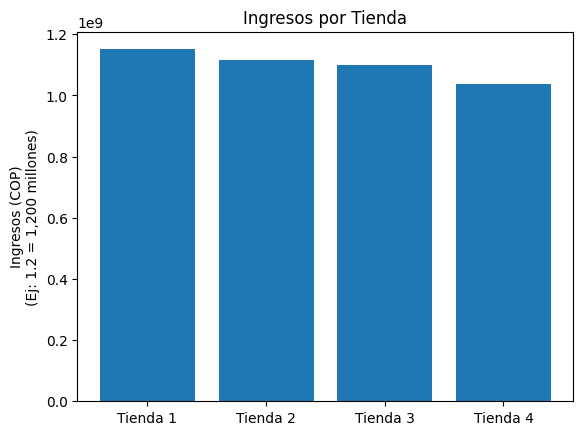

In [6]:
import matplotlib.pyplot as plt

# Datos
tiendas = list(ingresos.keys())
ingresos_cop = list(ingresos.values())

# Gráfico de barras
plt.bar(tiendas, ingresos_cop)
plt.title('Ingresos por Tienda')
plt.ylabel('Ingresos (COP)\n(Ej: 1.2 = 1,200 millones)')
plt.show()

La Tienda 1 registra el mayor ingreso total por ventas seguida por las Tiendas 2, 3 y 4 en ese orden.

# 2. Ventas por categoría

In [17]:
def mejor_categoria(tienda, nombre):                                     # Define la función y recibe los datos de una tienda
    ingresos = tienda.groupby("Categoría del Producto")["Precio"].sum()  # Suma ingresos por categoría
    mejor = ingresos.idxmax()                                            # Encuentra la categoría con más ingreso
    cop = ingresos[mejor]                                                # Obtiene el valor en COP
    usd = cop / tasa_cambio                                              # Convierte a USD
    print(f"\nMejor categoría en {nombre}:")                             # Imprime la tienda
    print(f"{mejor}: (COP ${cop:,.2f})  (USD ${usd:,.2f})")              # Muestra categoría + valores

mejor_categoria(tienda1, "Tienda 1")
mejor_categoria(tienda2, "Tienda 2")
mejor_categoria(tienda3, "Tienda 3")
mejor_categoria(tienda4, "Tienda 4")


Mejor categoría en Tienda 1:
Electrónicos: (COP $429,493,500.00)  (USD $102,479.96)

Mejor categoría en Tienda 2:
Electrónicos: (COP $410,831,100.00)  (USD $98,026.99)

Mejor categoría en Tienda 3:
Electrónicos: (COP $410,775,800.00)  (USD $98,013.79)

Mejor categoría en Tienda 4:
Electrónicos: (COP $409,476,100.00)  (USD $97,703.67)


La categoría Electrónicos fue la más vendida en todas las tiendas de Alura Store. En términos de ingresos, la tienda 1 supera a las demas.

Esto confirma que Electrónicos es la categoría líder en ventas, con un rendimiento ligeramente superior en la Tienda 1.

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda